<a href="https://colab.research.google.com/github/tuhintiwari/bc_ferries_22/blob/main/bc_ferries_assessment_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis** - BC Ferries Route between Vancouver and Sunshine Coast

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt2
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [55]:
task2_df = pd.read_excel('/content/drive/MyDrive/Colab_Data/bc_ferries/BC Ferries - Senior Data Scientist Assessment Data.xlsx', sheet_name=1, header=1)

In [56]:
total_cols_t2 = task2_df.columns
num_col_t2 = task2_df._get_numeric_data().columns
datetime_cols_t2 = task2_df.select_dtypes(include=['datetime64']).columns
cat_col_t2 = list(set(total_cols_t2)-set(num_col_t2)-set(datetime_cols_t2))

In [57]:
print('Total Columns', total_cols_t2)
print('Numeric Columns', num_col_t2)
print('Datetime Columns', datetime_cols_t2)
print('Categorical Columns', cat_col_t2)

Total Columns Index(['Vessel', 'Departure Terminal', 'Arrival Terminal', 'Sched Dept Ts',
       'Actual Dept Ts', 'Sched Arr Ts', 'Actual Arr Ts', 'Bus', 'Semi',
       'Commercial', 'Over Height Private Vehicle',
       'Under Height Private Vehicle ', 'Foot Passengers',
       'Vehicle Passengers', 'Bus Overloads', 'Semi Overloads',
       'Commercial Overloads', 'Over Height Private Vehicle Overloads',
       'Under Height Private Vehicle  Overloads'],
      dtype='object')
Numeric Columns Index(['Semi', 'Commercial', 'Over Height Private Vehicle',
       'Under Height Private Vehicle ', 'Foot Passengers',
       'Vehicle Passengers', 'Semi Overloads', 'Commercial Overloads',
       'Over Height Private Vehicle Overloads',
       'Under Height Private Vehicle  Overloads'],
      dtype='object')
Datetime Columns Index(['Sched Dept Ts', 'Actual Dept Ts', 'Sched Arr Ts', 'Actual Arr Ts'], dtype='object')
Categorical Columns ['Departure Terminal', 'Vessel', 'Bus', 'Arrival Terminal', '

**Features Description**

In [58]:
task2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6460 entries, 0 to 6459
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Vessel                                   6459 non-null   object        
 1   Departure Terminal                       6459 non-null   object        
 2   Arrival Terminal                         6459 non-null   object        
 3   Sched Dept Ts                            6459 non-null   datetime64[ns]
 4   Actual Dept Ts                           6459 non-null   datetime64[ns]
 5   Sched Arr Ts                             6459 non-null   datetime64[ns]
 6   Actual Arr Ts                            6459 non-null   datetime64[ns]
 7   Bus                                      6460 non-null   object        
 8   Semi                                     6459 non-null   float64       
 9   Commercial                               

In [59]:
task2_df.describe()

,Semi,Commercial,Over Height Private Vehicle,Under Height Private Vehicle,Foot Passengers,Vehicle Passengers,Semi Overloads,Commercial Overloads,Over Height Private Vehicle Overloads,Under Height Private Vehicle Overloads
count,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000,6459.000000
mean,2.264747,3.589875,10.805697,163.806626,88.444341,329.529803,0.203747,0.268463,0.961294,13.105589
std,2.318723,3.480703,6.395637,79.394819,64.023657,179.807107,0.700823,0.912431,2.716567,41.589166
min,0.000000,0.000000,0.000000,-2.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,6.000000,102.000000,40.000000,188.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,10.000000,167.000000,78.000000,324.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,5.000000,15.000000,230.000000,123.000000,457.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,20.000000,37.000000,890.000000,641.000000,1026.000000,8.000000,11.000000,30.000000,866.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


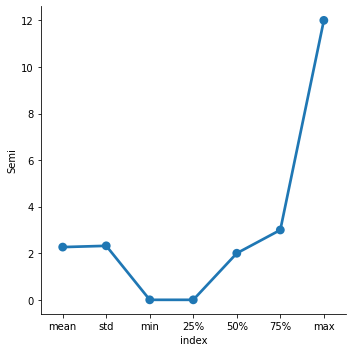

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


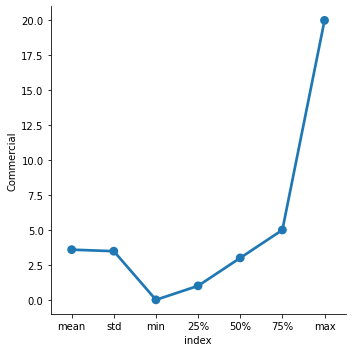

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


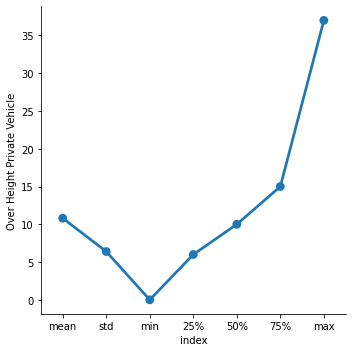

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


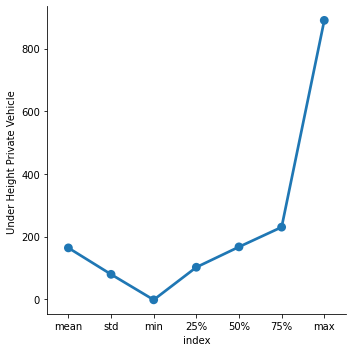

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


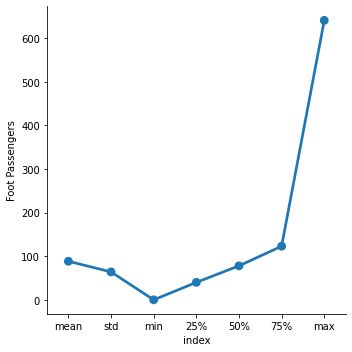

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


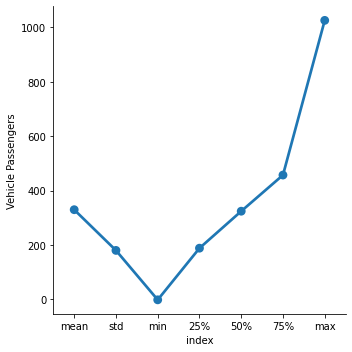

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


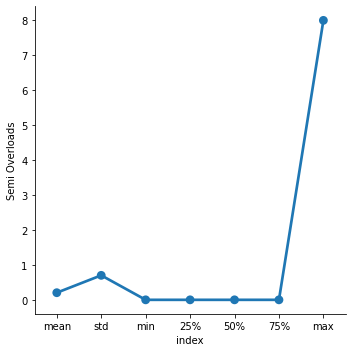

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


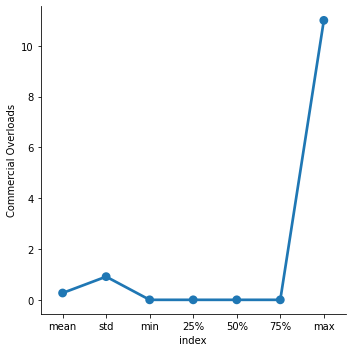

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


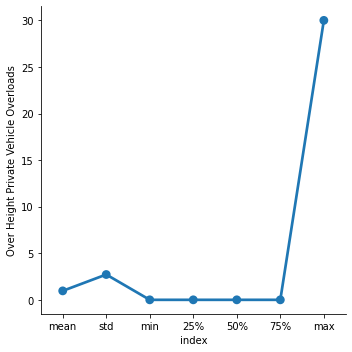

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


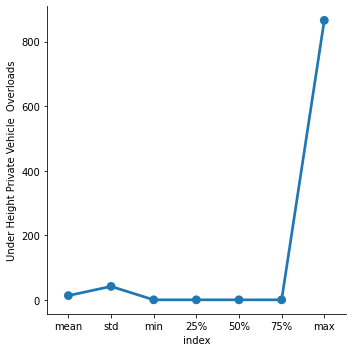

In [60]:
describe_num_df = task2_df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col_t2:
  if i in ['index']:
    continue
  sns.factorplot(x='index', y=i, data=describe_num_df)
  plt2.show()

**Plotting Null Values**

In [61]:
null_df_t2 = task2_df.apply(lambda x: sum(x.isnull())).to_frame(name='null_count')
print(null_df_t2)

                                         null_count
Vessel                                            1
Departure Terminal                                1
Arrival Terminal                                  1
Sched Dept Ts                                     1
Actual Dept Ts                                    1
Sched Arr Ts                                      1
Actual Arr Ts                                     1
Bus                                               0
Semi                                              1
Commercial                                        1
Over Height Private Vehicle                       1
Under Height Private Vehicle                      1
Foot Passengers                                   1
Vehicle Passengers                                1
Bus Overloads                                     0
Semi Overloads                                    1
Commercial Overloads                              1
Over Height Private Vehicle Overloads             1
Under Height

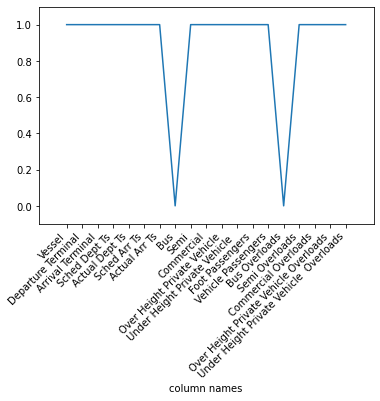

In [62]:
plt2.plot(null_df_t2.index, null_df_t2['null_count'])
plt2.xticks(null_df_t2.index, null_df_t2.index, rotation=45,
horizontalalignment='right')
plt2.xlabel('column names')
plt2.margins(0.1)
plt2.show()

In [63]:
task2_df[task2_df.isna().any(axis=1)]

,Vessel,Departure Terminal,Arrival Terminal,Sched Dept Ts,Actual Dept Ts,Sched Arr Ts,Actual Arr Ts,Bus,Semi,Commercial,Over Height Private Vehicle,Under Height Private Vehicle,Foot Passengers,Vehicle Passengers,Bus Overloads,Semi Overloads,Commercial Overloads,Over Height Private Vehicle Overloads,Under Height Private Vehicle Overloads
6459,NaN,NaN,NaN,NaT,NaT,NaT,NaT,- 1 -,NaN,NaN,NaN,NaN,NaN,NaN,13:44:07,NaN,NaN,NaN,NaN


In [64]:
# Since the entire row has more than 85% NaNs, we are going to drop the row
perc = 85.0 # Here N is 85
min_count =  int(((100-perc)/100)*task2_df.shape[1] + 1)
task2_df = task2_df.dropna(axis = 0, thresh=min_count)

In [65]:
min_count

3

In [66]:
task2_df[task2_df.isna().any(axis=1)]

,Vessel,Departure Terminal,Arrival Terminal,Sched Dept Ts,Actual Dept Ts,Sched Arr Ts,Actual Arr Ts,Bus,Semi,Commercial,Over Height Private Vehicle,Under Height Private Vehicle,Foot Passengers,Vehicle Passengers,Bus Overloads,Semi Overloads,Commercial Overloads,Over Height Private Vehicle Overloads,Under Height Private Vehicle Overloads


In [67]:
task2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6459 entries, 0 to 6458
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Vessel                                   6459 non-null   object        
 1   Departure Terminal                       6459 non-null   object        
 2   Arrival Terminal                         6459 non-null   object        
 3   Sched Dept Ts                            6459 non-null   datetime64[ns]
 4   Actual Dept Ts                           6459 non-null   datetime64[ns]
 5   Sched Arr Ts                             6459 non-null   datetime64[ns]
 6   Actual Arr Ts                            6459 non-null   datetime64[ns]
 7   Bus                                      6459 non-null   object        
 8   Semi                                     6459 non-null   float64       
 9   Commercial                               

In [68]:
# Check if there's any null values left
null_df_t2 = task2_df.apply(lambda x: sum(x.isnull())).to_frame(name='null_count')
print(null_df_t2)

                                         null_count
Vessel                                            0
Departure Terminal                                0
Arrival Terminal                                  0
Sched Dept Ts                                     0
Actual Dept Ts                                    0
Sched Arr Ts                                      0
Actual Arr Ts                                     0
Bus                                               0
Semi                                              0
Commercial                                        0
Over Height Private Vehicle                       0
Under Height Private Vehicle                      0
Foot Passengers                                   0
Vehicle Passengers                                0
Bus Overloads                                     0
Semi Overloads                                    0
Commercial Overloads                              0
Over Height Private Vehicle Overloads             0
Under Height

**Plotting value_counts() function for categorical variables.**

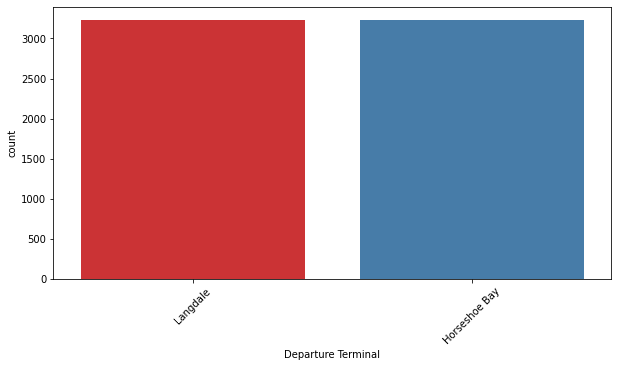

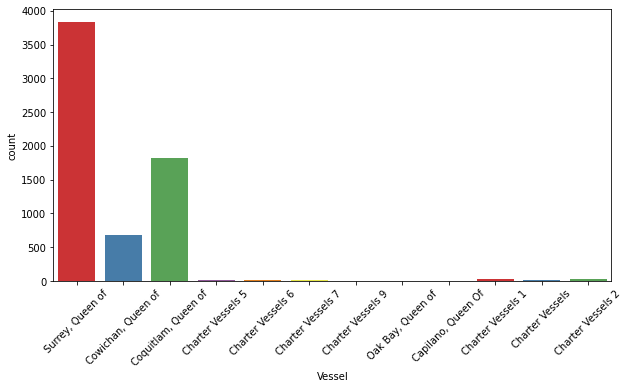

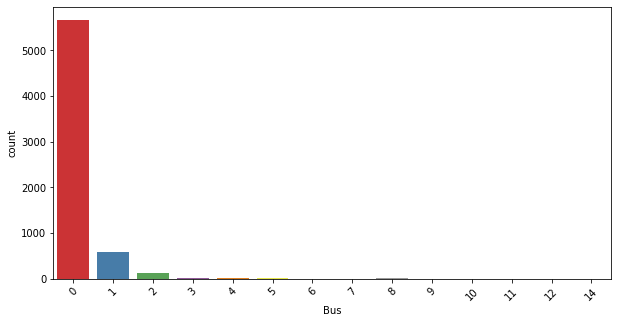

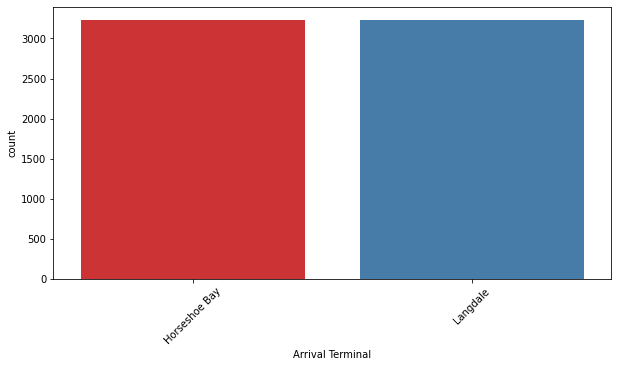

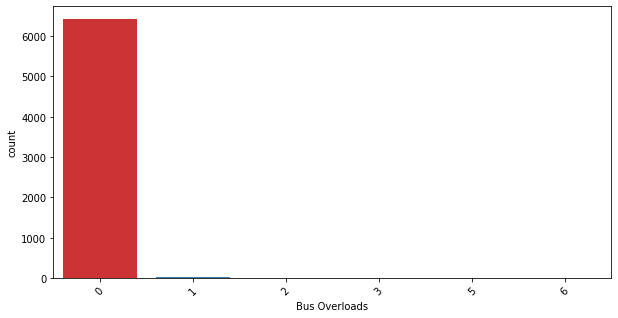

In [69]:
for i in cat_col_t2:
   if i in ['source']:
      continue
   plt2.figure(figsize=(10, 5))
   chart = sns.countplot(
   data=task2_df,
   x=i,
   palette='Set1'
 )
   chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
   plt2.show()

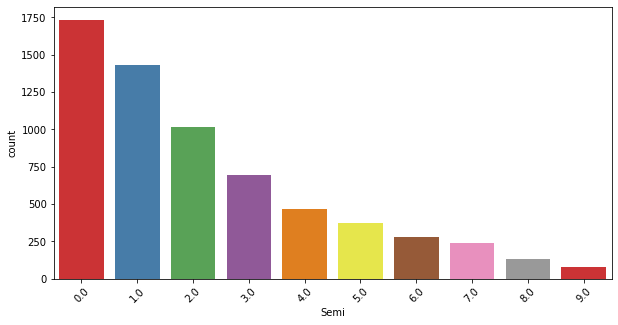

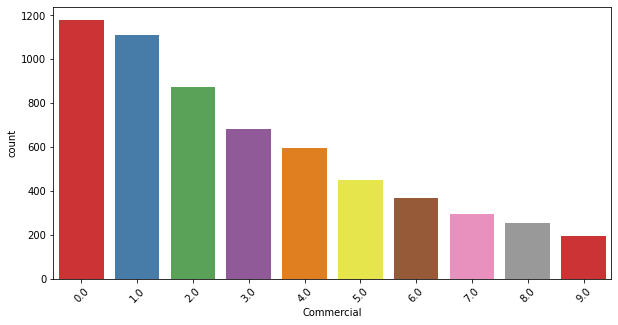

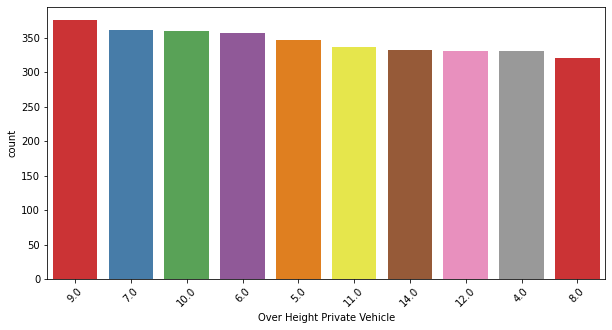

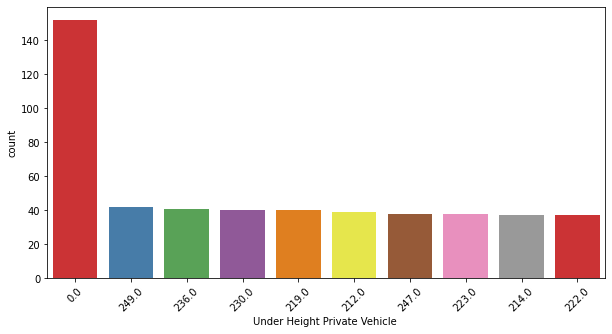

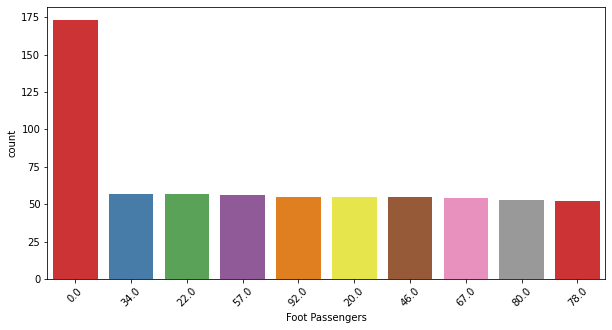

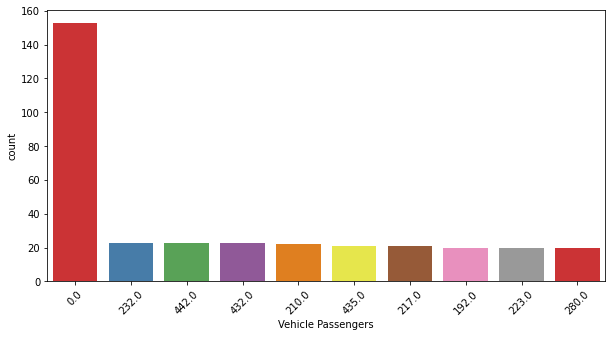

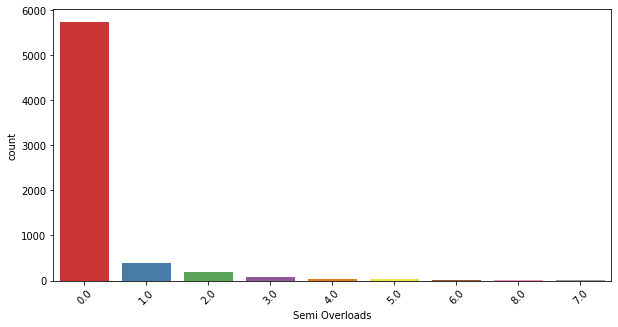

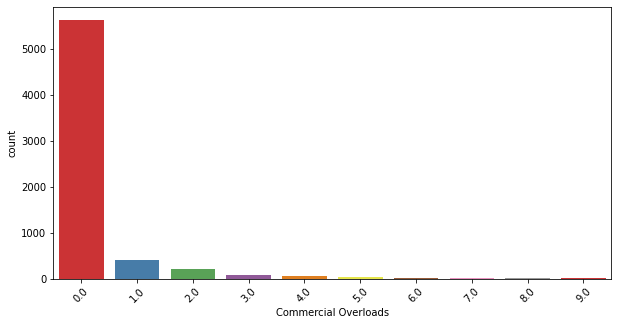

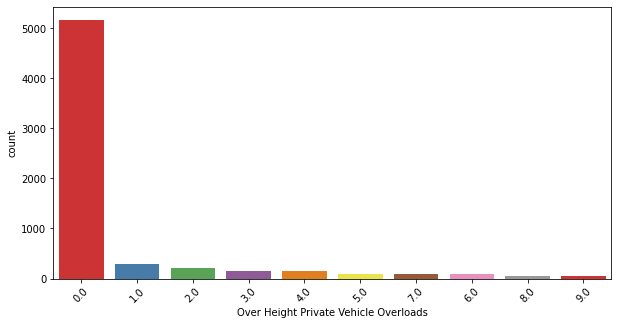

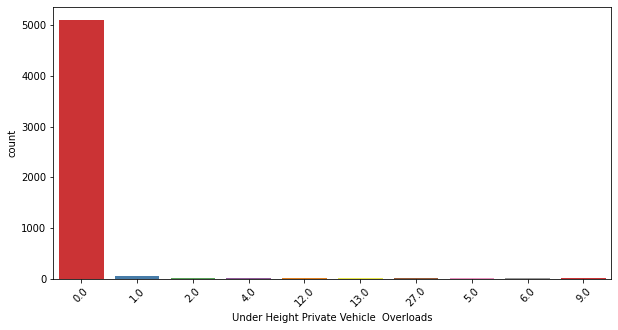

In [70]:
for i in num_col_t2:
   if i in ['source']:
     continue
   plt2.figure(figsize=(10, 5))
   chart = sns.countplot(
             data=task2_df,
             x=i,
             palette='Set1',
# This option plot top category of numerical values.
             order=pd.value_counts(task2_df[i]).iloc[:10].index
           )
   chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
   plt2.show()

**Skew and Kurtosis**

In [71]:
skew = {}
kurt = {}
for i in num_col_t2:
# to skip columns for plotting
   if i in ['num_orders']:
       continue
   skew[i] = task2_df[i].skew()
   kurt[i] = task2_df[i].kurt()
print(skew)

{'Semi': 1.132460760809597, 'Commercial': 1.2621581380505422, 'Over Height Private Vehicle': 0.4067495382106753, 'Under Height Private Vehicle ': -0.06519411289292415, 'Foot Passengers': 1.498305300775205, 'Vehicle Passengers': 0.2501987842717607, 'Semi Overloads': 4.582147619206079, 'Commercial Overloads': 4.983706192953452, 'Over Height Private Vehicle Overloads': 4.036164262305156, 'Under Height Private Vehicle  Overloads': 5.647620244782549}


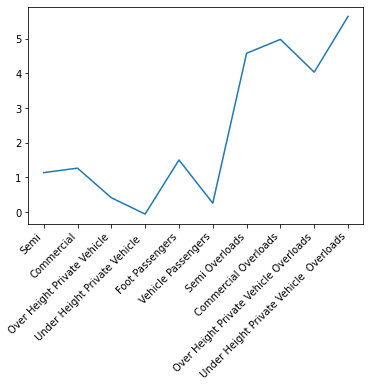

In [72]:
plt2.plot(list(skew.keys()),list(skew.values()))
plt2.xticks(rotation=45, horizontalalignment='right')
plt2.show()

In [73]:
print(kurt)

{'Semi': 0.6518036420087965, 'Commercial': 1.451984292684847, 'Over Height Private Vehicle': -0.33202422978092816, 'Under Height Private Vehicle ': 0.17631783512603905, 'Foot Passengers': 4.9190734443386255, 'Vehicle Passengers': -0.5341267197996191, 'Semi Overloads': 25.512709847559208, 'Commercial Overloads': 31.54509228220253, 'Over Height Private Vehicle Overloads': 19.948599283532225, 'Under Height Private Vehicle  Overloads': 52.408389047324}


In [74]:
corrmat = task2_df.corr()
print(corrmat)

                                             Semi  ...  Under Height Private Vehicle  Overloads
Semi                                     1.000000  ...                                 0.000741
Commercial                               0.530789  ...                                 0.022750
Over Height Private Vehicle              0.360041  ...                                 0.286727
Under Height Private Vehicle             0.140040  ...                                 0.370662
Foot Passengers                         -0.068828  ...                                 0.440921
Vehicle Passengers                       0.064648  ...                                 0.444932
Semi Overloads                           0.373686  ...                                 0.204092
Commercial Overloads                     0.317494  ...                                 0.249017
Over Height Private Vehicle Overloads    0.181254  ...                                 0.669450
Under Height Private Vehicle  Overloads 

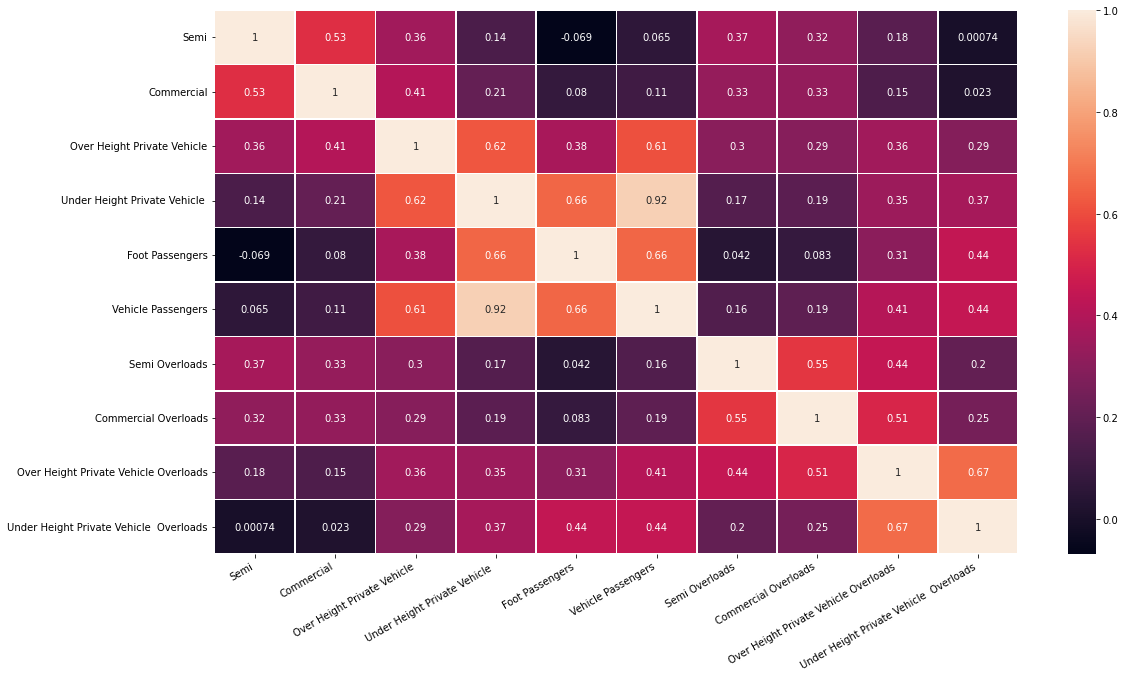

In [75]:
plt2.figure(figsize=(18, 10))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt2.xticks(rotation=30, horizontalalignment='right')
plt2.show()

In [76]:
datetime_cols_t2

Index(['Sched Dept Ts', 'Actual Dept Ts', 'Sched Arr Ts', 'Actual Arr Ts'], dtype='object')

In [77]:
task2_df.dtypes

Vessel                                             object
Departure Terminal                                 object
Arrival Terminal                                   object
Sched Dept Ts                              datetime64[ns]
Actual Dept Ts                             datetime64[ns]
Sched Arr Ts                               datetime64[ns]
Actual Arr Ts                              datetime64[ns]
Bus                                                object
Semi                                              float64
Commercial                                        float64
Over Height Private Vehicle                       float64
Under Height Private Vehicle                      float64
Foot Passengers                                   float64
Vehicle Passengers                                float64
Bus Overloads                                      object
Semi Overloads                                    float64
Commercial Overloads                              float64
Over Height Pr

In [78]:
columns_to_be_converted = ['Semi', 'Commercial', 'Over Height Private Vehicle', 'Under Height Private Vehicle ', 'Foot Passengers', 'Vehicle Passengers', 'Bus Overloads', 'Semi Overloads', 'Commercial Overloads', 'Over Height Private Vehicle Overloads', 'Under Height Private Vehicle  Overloads']
task2_df[columns_to_be_converted] = task2_df[columns_to_be_converted].astype(int)

In [79]:
task2_df.head(2)

,Vessel,Departure Terminal,Arrival Terminal,Sched Dept Ts,Actual Dept Ts,Sched Arr Ts,Actual Arr Ts,Bus,Semi,Commercial,Over Height Private Vehicle,Under Height Private Vehicle,Foot Passengers,Vehicle Passengers,Bus Overloads,Semi Overloads,Commercial Overloads,Over Height Private Vehicle Overloads,Under Height Private Vehicle Overloads
0,"Surrey, Queen of",Langdale,Horseshoe Bay,2019-01-01 08:40:00,2019-01-01 08:40:00,2019-01-01 09:19:59.999,2019-01-01 09:19:59.999,0,0,0,4,153,41,322,0,0,0,0,0
1,"Surrey, Queen of",Horseshoe Bay,Langdale,2019-01-01 09:45:00,2019-01-01 09:46:00,2019-01-01 10:24:59.999,2019-01-01 10:26:59.999,0,1,0,3,118,37,261,0,0,0,0,0


In [80]:
task2_df['departure_delay'] = task2_df['Actual Dept Ts'] - task2_df['Sched Dept Ts']

In [81]:
task2_df['arrival_delay'] = task2_df['Actual Arr Ts'] - task2_df['Sched Arr Ts']

In [82]:
task2_df.head()

,Vessel,Departure Terminal,Arrival Terminal,Sched Dept Ts,Actual Dept Ts,Sched Arr Ts,Actual Arr Ts,Bus,Semi,Commercial,Over Height Private Vehicle,Under Height Private Vehicle,Foot Passengers,Vehicle Passengers,Bus Overloads,Semi Overloads,Commercial Overloads,Over Height Private Vehicle Overloads,Under Height Private Vehicle Overloads,departure_delay,arrival_delay
0,"Surrey, Queen of",Langdale,Horseshoe Bay,2019-01-01 08:40:00.000,2019-01-01 08:40:00.000,2019-01-01 09:19:59.999,2019-01-01 09:19:59.999,0,0,0,4,153,41,322,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00
1,"Surrey, Queen of",Horseshoe Bay,Langdale,2019-01-01 09:45:00.000,2019-01-01 09:46:00.000,2019-01-01 10:24:59.999,2019-01-01 10:26:59.999,0,1,0,3,118,37,261,0,0,0,0,0,0 days 00:01:00,0 days 00:02:00
2,"Surrey, Queen of",Langdale,Horseshoe Bay,2019-01-01 10:49:59.999,2019-01-01 10:49:59.999,2019-01-01 11:29:59.999,2019-01-01 11:34:59.999,0,1,0,5,271,112,638,0,0,0,0,0,0 days 00:00:00,0 days 00:05:00
3,"Surrey, Queen of",Horseshoe Bay,Langdale,2019-01-01 11:54:59.999,2019-01-01 11:58:00.000,2019-01-01 12:35:00.000,2019-01-01 12:37:59.999,0,0,0,7,125,75,287,0,0,0,0,0,0 days 00:03:00.001000,0 days 00:02:59.999000
4,"Surrey, Queen of",Langdale,Horseshoe Bay,2019-01-01 13:04:59.999,2019-01-01 13:06:00.000,2019-01-01 13:44:59.999,2019-01-01 13:47:00.000,0,0,0,9,312,164,792,0,0,0,3,84,0 days 00:01:00.001000,0 days 00:02:00.001000


In [83]:
task2_df['total_delay'] = task2_df['departure_delay'] + task2_df['arrival_delay']

In [84]:
task2_df.head(2)

,Vessel,Departure Terminal,Arrival Terminal,Sched Dept Ts,Actual Dept Ts,Sched Arr Ts,Actual Arr Ts,Bus,Semi,Commercial,Over Height Private Vehicle,Under Height Private Vehicle,Foot Passengers,Vehicle Passengers,Bus Overloads,Semi Overloads,Commercial Overloads,Over Height Private Vehicle Overloads,Under Height Private Vehicle Overloads,departure_delay,arrival_delay,total_delay
0,"Surrey, Queen of",Langdale,Horseshoe Bay,2019-01-01 08:40:00,2019-01-01 08:40:00,2019-01-01 09:19:59.999,2019-01-01 09:19:59.999,0,0,0,4,153,41,322,0,0,0,0,0,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00
1,"Surrey, Queen of",Horseshoe Bay,Langdale,2019-01-01 09:45:00,2019-01-01 09:46:00,2019-01-01 10:24:59.999,2019-01-01 10:26:59.999,0,1,0,3,118,37,261,0,0,0,0,0,0 days 00:01:00,0 days 00:02:00,0 days 00:03:00


In [85]:
task2_df['total_overload'] = task2_df['Bus Overloads'] + task2_df['Semi Overloads'] + task2_df['Commercial Overloads'] + task2_df['Over Height Private Vehicle Overloads'] + task2_df['Under Height Private Vehicle  Overloads']

**Exploring time series analysis for percentage overload Vs Month of the Year**

In [86]:
y_overload = task2_df

In [87]:
y_delay = task2_df[['total_delay', 'Bus Overloads', 'Semi Overloads', 'Commercial Overloads', 'Over Height Private Vehicle Overloads', 'Under Height Private Vehicle  Overloads']]

In [88]:
y_delay.head()

,total_delay,Bus Overloads,Semi Overloads,Commercial Overloads,Over Height Private Vehicle Overloads,Under Height Private Vehicle Overloads
0,0 days 00:00:00,0,0,0,0,0
1,0 days 00:03:00,0,0,0,0,0
2,0 days 00:05:00,0,0,0,0,0
3,0 days 00:06:00,0,0,0,0,0
4,0 days 00:03:00.002000,0,0,0,3,84


In [89]:
y_delay['total_overload'] = y_delay['Bus Overloads'] + y_delay['Semi Overloads'] + y_delay['Commercial Overloads'] + y_delay['Over Height Private Vehicle Overloads'] + y_delay['Under Height Private Vehicle  Overloads']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
y_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6459 entries, 0 to 6458
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype          
---  ------                                   --------------  -----          
 0   total_delay                              6459 non-null   timedelta64[ns]
 1   Bus Overloads                            6459 non-null   int64          
 2   Semi Overloads                           6459 non-null   int64          
 3   Commercial Overloads                     6459 non-null   int64          
 4   Over Height Private Vehicle Overloads    6459 non-null   int64          
 5   Under Height Private Vehicle  Overloads  6459 non-null   int64          
 6   total_overload                           6459 non-null   int64          
dtypes: int64(6), timedelta64[ns](1)
memory usage: 723.7 KB


In [91]:
data = y_delay.iloc[:, 0:6200]
model = VAR(data)
model_fit = model.fit()

ValueError: ignored